In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

# **CS 6140 - Final Project**
## Practicing Convolutional Neural Network (CIFAR 10 Challenge)
#### Isidora Conic
#### Fall 2021

In [138]:
#Importing necessary libraries
import tensorflow as tf
from tensorflow import keras
import sklearn as sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

In [139]:
dataset, info = tfds.load("cifar10", as_supervised=True, with_info=True)

In [140]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = cifar10.load_data()

In [141]:
#Looking at the data labels (i.e. categories)
class_names = info.features['label'].names
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [142]:
#Checking the shape of the train and test sets to make sure that the above is true
print("X_train shape = ", X_train_full.shape)
print("y_train shape = ", y_train_full.shape)
print("X_test shape = ", X_test_full.shape)
print("y_test shape = ", y_test_full.shape)

X_train shape =  (50000, 32, 32, 3)
y_train shape =  (50000, 1)
X_test shape =  (10000, 32, 32, 3)
y_test shape =  (10000, 1)


The results above (shape) makes sense since the X_train and X_test sets have a shape of `(50000, 32, 32, 3)` and `(10000, 32, 32, 3)`, respectively, meaning that they have 50,000 and 10,000 images, rescpectively, and each of these images are represented by a matrix of pixels. Each image is 32x32 pixels, and the then a single pixel has an RGB value (colour). For y_train and and y_test, the shape is `(50000, 1)` and `(10000, 1)`, respectively, corresponding to the number of samples and the class that the image belongs to (one of 10 classes in this case).

In [143]:
#Prep-processing to change the shape of input

#Tranforming categorical data to encoded (numerical) values
y_train_full = to_categorical(y_train_full, num_classes=10)
y_test_full = to_categorical(y_test_full, num_classes=10)

#Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)
X_train_full = X_train_full.astype('float32')
X_test_full = X_test_full.astype('float32')

#Normalizing the pixel values to 0-1
X_train_full /= 255
X_test_full /= 255

In [144]:
#Now we have to split the train data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

In [145]:
#Checking the shape of the new train and test sets 
print("X_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("X_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

X_train shape =  (35000, 32, 32, 3)
y_train shape =  (35000, 10)
X_test shape =  (15000, 32, 32, 3)
y_test shape =  (15000, 10)


In [183]:
#Code for plotting training and validation loss
#Function taken from: https://thedatafrog.com/en/articles/image-recognition-transfer-learning/
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss, label="training loss")
    plt.plot(epochs, val_loss, label="validation loss")
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

### **Attempting to model with LeNet-5 Architecture**



In [185]:
lenet_model = keras.Sequential()

#Convolutional layer 1
lenet_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
lenet_model.add(layers.AveragePooling2D())

#Convolutional layer 2
lenet_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
lenet_model.add(layers.AveragePooling2D())

#Flattening layer
lenet_model.add(layers.Flatten())

#2 fully connected layers
lenet_model.add(layers.Dense(units=256, activation='relu'))
lenet_model.add(layers.Dense(units=120, activation='relu'))

#Classification layer using softmax
lenet_model.add(layers.Dense(units=10, activation = 'softmax'))

#Using SGD as the optimizer
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
lenet_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [186]:
#Training the CNN with 15 epochs
history = lenet_model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
875/875 - 4s - loss: 1.8066 - accuracy: 0.3429 - val_loss: 1.5586 - val_accuracy: 0.4351 - 4s/epoch - 5ms/step
Epoch 2/15
875/875 - 4s - loss: 1.4418 - accuracy: 0.4842 - val_loss: 1.3542 - val_accuracy: 0.5144 - 4s/epoch - 4ms/step
Epoch 3/15
875/875 - 4s - loss: 1.2775 - accuracy: 0.5383 - val_loss: 1.2877 - val_accuracy: 0.5429 - 4s/epoch - 4ms/step
Epoch 4/15
875/875 - 4s - loss: 1.1506 - accuracy: 0.5890 - val_loss: 1.2195 - val_accuracy: 0.5597 - 4s/epoch - 4ms/step
Epoch 5/15
875/875 - 4s - loss: 1.0363 - accuracy: 0.6309 - val_loss: 1.1877 - val_accuracy: 0.5766 - 4s/epoch - 4ms/step
Epoch 6/15
875/875 - 4s - loss: 0.9240 - accuracy: 0.6707 - val_loss: 1.1685 - val_accuracy: 0.5919 - 4s/epoch - 4ms/step
Epoch 7/15
875/875 - 4s - loss: 0.8160 - accuracy: 0.7108 - val_loss: 1.1152 - val_accuracy: 0.6183 - 4s/epoch - 4ms/step
Epoch 8/15
875/875 - 4s - loss: 0.7005 - accuracy: 0.7494 - val_loss: 1.1848 - val_accuracy: 0.6163 - 4s/epoch - 5ms/step
Epoch 9/15
875/875 - 4s 

In [187]:
#Getting the accuracy score of the model
score = lenet_model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [188]:
#Printing the accuracy score
print(lenet_model.metrics_names)
print(score)

['loss', 'accuracy']
[1.7877134084701538, 0.6241999864578247]


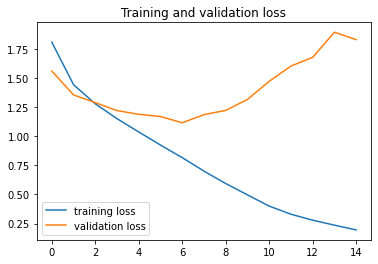

In [189]:
#Plotting training and validation loss
plot_history(history, yrange=(0.9,1))

Clearly, the above accuracy is decent. We can try to add some regularization to our model in order to improve it and see what happens. I will try the following:

1. **Batch Normalization:** I will add in some batch normalization layers, which will serve to standardize the inputs to a layer of my model for each mini-batch.

2. **Dropout layers:** I will also add in some dropout layers in order to reduce overfitting and improve generalization error. It does this by "dropping" some number of of layer inputs, which in turn simulates that particular layer having a different configuration (different number of nodes and connectivity to the prior layer). Essentially, we are trying to model like we are training multiple neural networks with different architectures in parallel. (https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/)

3. **Data Augmentation:** This will create modfied images in our dataset (essentially expanding the dataset). This allows the model to be better in generalization. 

4. **Different Optimizer:** In this case, I am using SGD, but will also try Adam.




#### (1) Batch Normalization
I will use the same model as above, but add in batch normalizaton layers.

In [190]:
lenet_model = keras.Sequential()

#Convolutional layer #1
lenet_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
lenet_model.add(layers.AveragePooling2D())
#Adding in batch normalization to normalize inputs into the next layer
lenet_model.add(BatchNormalization())

#Convolutional layer #2
lenet_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
lenet_model.add(layers.AveragePooling2D())
#Adding in batch normalization
lenet_model.add(BatchNormalization())

#Flattening layer
lenet_model.add(layers.Flatten())

#2 fully connected layers
lenet_model.add(layers.Dense(units=256, activation='relu'))
lenet_model.add(layers.Dense(units=120, activation='relu'))

#Adding in batch normalization
lenet_model.add(BatchNormalization())

#Classification layer
lenet_model.add(layers.Dense(units=10, activation = 'softmax'))

#Using SGD as the optimizer
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
lenet_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [191]:
#Training the CNN
history = lenet_model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=2, validation_split=0.2)

Epoch 1/30
875/875 - 8s - loss: 1.5892 - accuracy: 0.4283 - val_loss: 1.7001 - val_accuracy: 0.4206 - 8s/epoch - 9ms/step
Epoch 2/30
875/875 - 5s - loss: 1.2147 - accuracy: 0.5683 - val_loss: 1.3443 - val_accuracy: 0.5336 - 5s/epoch - 6ms/step
Epoch 3/30
875/875 - 5s - loss: 1.0215 - accuracy: 0.6385 - val_loss: 1.4113 - val_accuracy: 0.5377 - 5s/epoch - 6ms/step
Epoch 4/30
875/875 - 5s - loss: 0.8679 - accuracy: 0.6961 - val_loss: 1.0657 - val_accuracy: 0.6376 - 5s/epoch - 6ms/step
Epoch 5/30
875/875 - 5s - loss: 0.7261 - accuracy: 0.7456 - val_loss: 1.0645 - val_accuracy: 0.6417 - 5s/epoch - 6ms/step
Epoch 6/30
875/875 - 5s - loss: 0.6074 - accuracy: 0.7865 - val_loss: 1.2748 - val_accuracy: 0.6040 - 5s/epoch - 6ms/step
Epoch 7/30
875/875 - 5s - loss: 0.4814 - accuracy: 0.8331 - val_loss: 1.2379 - val_accuracy: 0.6361 - 5s/epoch - 6ms/step
Epoch 8/30
875/875 - 6s - loss: 0.3799 - accuracy: 0.8656 - val_loss: 1.4490 - val_accuracy: 0.6141 - 6s/epoch - 7ms/step
Epoch 9/30
875/875 - 6s 

In [192]:
#Getting the accuracy score of the model
score = lenet_model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [193]:
#Printing the accuracy score
print(lenet_model.metrics_names)
print(score)

['loss', 'accuracy']
[2.226181983947754, 0.6722000241279602]


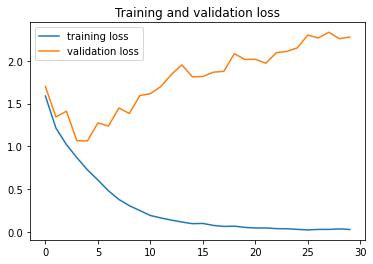

In [194]:
#Plotting training and validation loss
plot_history(history, yrange=(0.9,1))

### (2) Adding Dropout Layers

In [195]:
lenet_model = keras.Sequential()

#Convolutional layer #1
lenet_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
lenet_model.add(layers.AveragePooling2D())
#Adding in batch normalization
lenet_model.add(BatchNormalization())

#Convolutional layer #2
lenet_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
lenet_model.add(layers.AveragePooling2D())
#Adding in batch normalization
lenet_model.add(BatchNormalization())
#Adding dropout layer
lenet_model.add(layers.Dropout(0.25))

#Flattening layer
lenet_model.add(layers.Flatten())

#Fullyer connected layers
lenet_model.add(layers.Dense(units=256, activation='relu'))
lenet_model.add(layers.Dense(units=120, activation='relu'))

#Adding in batch normalization
lenet_model.add(BatchNormalization())

#Adding dropout
lenet_model.add(layers.Dropout(0.50))

#Classification layer
lenet_model.add(layers.Dense(units=10, activation = 'softmax'))

#SGD as optimizer
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
lenet_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [196]:
#Training the CNN
history = lenet_model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=2, validation_split=0.2)

Epoch 1/30
875/875 - 6s - loss: 1.8407 - accuracy: 0.3458 - val_loss: 1.6171 - val_accuracy: 0.4036 - 6s/epoch - 7ms/step
Epoch 2/30
875/875 - 4s - loss: 1.4726 - accuracy: 0.4692 - val_loss: 1.6827 - val_accuracy: 0.4144 - 4s/epoch - 5ms/step
Epoch 3/30
875/875 - 4s - loss: 1.3122 - accuracy: 0.5323 - val_loss: 1.2184 - val_accuracy: 0.5689 - 4s/epoch - 5ms/step
Epoch 4/30
875/875 - 4s - loss: 1.1828 - accuracy: 0.5814 - val_loss: 1.1469 - val_accuracy: 0.5904 - 4s/epoch - 5ms/step
Epoch 5/30
875/875 - 4s - loss: 1.0828 - accuracy: 0.6227 - val_loss: 1.0737 - val_accuracy: 0.6189 - 4s/epoch - 5ms/step
Epoch 6/30
875/875 - 5s - loss: 1.0021 - accuracy: 0.6491 - val_loss: 1.0570 - val_accuracy: 0.6294 - 5s/epoch - 6ms/step
Epoch 7/30
875/875 - 4s - loss: 0.9170 - accuracy: 0.6849 - val_loss: 1.1468 - val_accuracy: 0.6039 - 4s/epoch - 5ms/step
Epoch 8/30
875/875 - 4s - loss: 0.8531 - accuracy: 0.7049 - val_loss: 1.0109 - val_accuracy: 0.6470 - 4s/epoch - 5ms/step
Epoch 9/30
875/875 - 5s 

In [197]:
#Getting the accuracy score of the model
score = lenet_model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [198]:
#Printing the accuracy score
print(lenet_model.metrics_names)
print(score)

['loss', 'accuracy']
[1.2922841310501099, 0.6998000144958496]


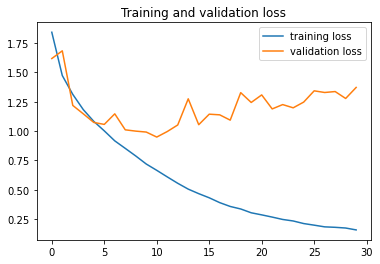

In [199]:
#Plotting training and validation loss
plot_history(history, yrange=(0.9,1))

### (3) Trying the Adam Optimizer

In [200]:
lenet_model = keras.Sequential()

#Convolutional layer #1
lenet_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
lenet_model.add(layers.AveragePooling2D())
#Adding in batch normalization
lenet_model.add(BatchNormalization())

#Convolutional layer #2
lenet_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
lenet_model.add(layers.AveragePooling2D())
#Adding in batch normalization
lenet_model.add(BatchNormalization())
#Adding dropout layer
lenet_model.add(layers.Dropout(0.25))

#Flattening layer
lenet_model.add(layers.Flatten())

#Fullyer connected layers
lenet_model.add(layers.Dense(units=256, activation='relu'))
lenet_model.add(layers.Dense(units=120, activation='relu'))

#Adding in batch normalization
lenet_model.add(BatchNormalization())

#Adding dropout
lenet_model.add(layers.Dropout(0.50))

#Classification layer
lenet_model.add(layers.Dense(units=10, activation = 'softmax'))

adam = Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)
lenet_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [201]:
#Training the CNN
history = lenet_model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=2, validation_split=0.2)

Epoch 1/30
875/875 - 6s - loss: 1.8452 - accuracy: 0.3736 - val_loss: 1.5285 - val_accuracy: 0.4564 - 6s/epoch - 6ms/step
Epoch 2/30
875/875 - 4s - loss: 1.3347 - accuracy: 0.5269 - val_loss: 2.0062 - val_accuracy: 0.3893 - 4s/epoch - 5ms/step
Epoch 3/30
875/875 - 4s - loss: 1.1482 - accuracy: 0.5984 - val_loss: 1.1875 - val_accuracy: 0.5820 - 4s/epoch - 5ms/step
Epoch 4/30
875/875 - 4s - loss: 1.0255 - accuracy: 0.6424 - val_loss: 1.1019 - val_accuracy: 0.6233 - 4s/epoch - 5ms/step
Epoch 5/30
875/875 - 5s - loss: 0.9217 - accuracy: 0.6822 - val_loss: 1.1219 - val_accuracy: 0.6061 - 5s/epoch - 6ms/step
Epoch 6/30
875/875 - 4s - loss: 0.8247 - accuracy: 0.7120 - val_loss: 0.9689 - val_accuracy: 0.6706 - 4s/epoch - 5ms/step
Epoch 7/30
875/875 - 5s - loss: 0.7278 - accuracy: 0.7474 - val_loss: 1.0499 - val_accuracy: 0.6604 - 5s/epoch - 6ms/step
Epoch 8/30
875/875 - 5s - loss: 0.6427 - accuracy: 0.7779 - val_loss: 1.0152 - val_accuracy: 0.6641 - 5s/epoch - 6ms/step
Epoch 9/30
875/875 - 4s 

In [202]:
#Getting the accuracy score of the model
score = lenet_model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [203]:
#Printing the accuracy score
print(lenet_model.metrics_names)
print(score)

['loss', 'accuracy']
[1.329882264137268, 0.6980000138282776]


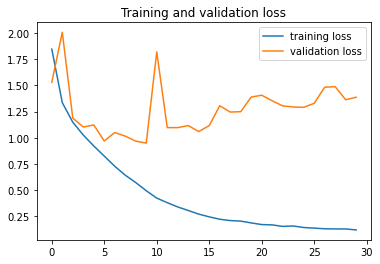

In [204]:
#Plotting training and validation loss
plot_history(history, yrange=(0.9,1))

### (4) Data Augmentation

In [205]:
from keras.preprocessing.image import ImageDataGenerator

In [206]:
#Data augmentation by rotatingm shifting (width and height), zooming, flipping, brightening, and filling pixels
#Creaing new validation and traning data with this to train the model on
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.2,1.2],
        fill_mode='nearest')
val_datagen = ImageDataGenerator()
training_generator = train_datagen.flow(X_train[:28000], y_train[:28000], batch_size=32)
val_generator = val_datagen.flow(X_train[28000:], y_train[28000:], batch_size=32)

In [207]:
#Same model as in previous step
lenet_model = keras.Sequential()

#Convolutional layer #1
lenet_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
lenet_model.add(layers.AveragePooling2D())
#Adding in batch normalization
lenet_model.add(BatchNormalization())

#Convolutional layer #2
lenet_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
lenet_model.add(layers.AveragePooling2D())
#Adding in batch normalization
lenet_model.add(BatchNormalization())
#Adding dropout layer
lenet_model.add(layers.Dropout(0.25))

#Flattening layer
lenet_model.add(layers.Flatten())

#Fully connected layers
lenet_model.add(layers.Dense(units=256, activation='relu'))
lenet_model.add(layers.Dense(units=120, activation='relu'))

#Adding in batch normalization
lenet_model.add(BatchNormalization())

#Adding dropout
lenet_model.add(layers.Dropout(0.50))

#Classification layer
lenet_model.add(layers.Dense(units=10, activation = 'softmax'))

adam = Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)
lenet_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [208]:
#Training the CNN
history = lenet_model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=2, validation_split=0.2)

Epoch 1/30
875/875 - 5s - loss: 1.7979 - accuracy: 0.3938 - val_loss: 1.7159 - val_accuracy: 0.3784 - 5s/epoch - 6ms/step
Epoch 2/30
875/875 - 4s - loss: 1.2936 - accuracy: 0.5438 - val_loss: 1.3130 - val_accuracy: 0.5314 - 4s/epoch - 5ms/step
Epoch 3/30
875/875 - 5s - loss: 1.1125 - accuracy: 0.6102 - val_loss: 1.1194 - val_accuracy: 0.6017 - 5s/epoch - 6ms/step
Epoch 4/30
875/875 - 4s - loss: 0.9949 - accuracy: 0.6559 - val_loss: 1.2963 - val_accuracy: 0.5669 - 4s/epoch - 5ms/step
Epoch 5/30
875/875 - 4s - loss: 0.8967 - accuracy: 0.6933 - val_loss: 0.9436 - val_accuracy: 0.6727 - 4s/epoch - 5ms/step
Epoch 6/30
875/875 - 5s - loss: 0.8006 - accuracy: 0.7250 - val_loss: 0.9078 - val_accuracy: 0.6823 - 5s/epoch - 6ms/step
Epoch 7/30
875/875 - 5s - loss: 0.7109 - accuracy: 0.7547 - val_loss: 0.9894 - val_accuracy: 0.6556 - 5s/epoch - 6ms/step
Epoch 8/30
875/875 - 4s - loss: 0.6387 - accuracy: 0.7792 - val_loss: 1.1236 - val_accuracy: 0.6451 - 4s/epoch - 5ms/step
Epoch 9/30
875/875 - 5s 

In [209]:
#Fitting the model on the augmented data
history = lenet_model.fit_generator(training_generator,    
                    validation_data=val_generator,
                    validation_steps=len(X_train[28000:]) / 32,
                    steps_per_epoch=len(X_train[:28000]) / 32,
                    epochs=15,
                    verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
875/875 - 28s - loss: 1.7359 - accuracy: 0.4501 - val_loss: 2.4303 - val_accuracy: 0.0947 - 28s/epoch - 32ms/step
Epoch 2/15
875/875 - 27s - loss: 1.4285 - accuracy: 0.4989 - val_loss: 2.6209 - val_accuracy: 0.1073 - 27s/epoch - 31ms/step
Epoch 3/15
875/875 - 27s - loss: 1.3778 - accuracy: 0.5170 - val_loss: 2.6097 - val_accuracy: 0.1000 - 27s/epoch - 31ms/step
Epoch 4/15
875/875 - 27s - loss: 1.3437 - accuracy: 0.5324 - val_loss: 2.6532 - val_accuracy: 0.1183 - 27s/epoch - 31ms/step
Epoch 5/15
875/875 - 27s - loss: 1.3256 - accuracy: 0.5389 - val_loss: 2.7796 - val_accuracy: 0.0936 - 27s/epoch - 31ms/step
Epoch 6/15
875/875 - 28s - loss: 1.2903 - accuracy: 0.5506 - val_loss: 2.7876 - val_accuracy: 0.1000 - 28s/epoch - 31ms/step
Epoch 7/15
875/875 - 27s - loss: 1.2745 - accuracy: 0.5575 - val_loss: 2.6045 - val_accuracy: 0.0997 - 27s/epoch - 31ms/step
Epoch 8/15
875/875 - 28s - loss: 1.2539 - accuracy: 0.5635 - val_loss: 3.0300 - val_accuracy: 0.1006 - 28s/epoch - 32ms/step


In [210]:
#Getting the accuracy score of the model
score = lenet_model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [211]:
#Printing the accuracy score
print(lenet_model.metrics_names)
print(score)

['loss', 'accuracy']
[2.7565503120422363, 0.12066666781902313]


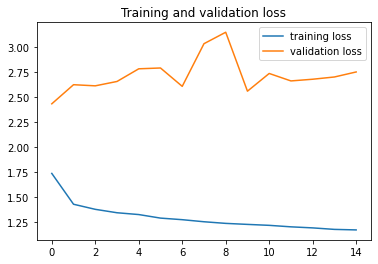

In [212]:
#Plotting training and validation loss
plot_history(history, yrange=(0.9,1))

### **Attempting to model with a Yann LeCun Architecture**
In the second CNN model, I will create a CNN with three convolutional layers and two fully connected layers, based on Yann LeCun's CNN architecture. However, I will use Adam as my optimizer, and include dropout and batch normalization.

In [223]:
lecun_model = keras.Sequential()
#Convolutional layer #1
lecun_model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
#Pooling layer
lecun_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#Batch normalization
lecun_model.add(BatchNormalization())

#Convolutional layer #2
lecun_model.add(layers.Conv2D(filters=64, activation='relu', kernel_size=(3, 3)))
#Pooling layer
lecun_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#Dropout layer
lecun_model.add(layers.Dropout(0.2))
#Batch normalization
lecun_model.add(BatchNormalization())

#Convolutional layer #3
lecun_model.add(layers.Conv2D(filters=128, activation='relu', kernel_size=(3, 3)))
#Pooling layer
lecun_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#Dropout layer
lecun_model.add(layers.Dropout(0.25))
#Batch normalization
lecun_model.add(BatchNormalization())

#Flattening layer
lecun_model.add(layers.Flatten())

#Fully connected layers
lecun_model.add(layers.Dense(units=256, activation='relu'))
lecun_model.add(layers.Dense(units=120, activation='relu'))

#Adding in batch normalization
lenet_model.add(BatchNormalization())

#Adding dropout
lenet_model.add(layers.Dropout(0.50))

#Classification layer
lecun_model.add(layers.Dense(units=10, activation = 'softmax'))

adam = Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)
lecun_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [234]:
lecun_model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_98 (Bat  (None, 15, 15, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_67 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

In [224]:
#Training the CNN
history = lecun_model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=2, validation_split=0.2)

Epoch 1/30
875/875 - 6s - loss: 1.5384 - accuracy: 0.4393 - val_loss: 1.3995 - val_accuracy: 0.5024 - 6s/epoch - 7ms/step
Epoch 2/30
875/875 - 5s - loss: 1.2212 - accuracy: 0.5673 - val_loss: 1.2904 - val_accuracy: 0.5547 - 5s/epoch - 6ms/step
Epoch 3/30
875/875 - 5s - loss: 1.0839 - accuracy: 0.6174 - val_loss: 1.3766 - val_accuracy: 0.5204 - 5s/epoch - 5ms/step
Epoch 4/30
875/875 - 5s - loss: 0.9836 - accuracy: 0.6549 - val_loss: 1.2119 - val_accuracy: 0.5791 - 5s/epoch - 6ms/step
Epoch 5/30
875/875 - 5s - loss: 0.9013 - accuracy: 0.6832 - val_loss: 1.1096 - val_accuracy: 0.6076 - 5s/epoch - 6ms/step
Epoch 6/30
875/875 - 6s - loss: 0.8446 - accuracy: 0.7041 - val_loss: 1.1674 - val_accuracy: 0.6116 - 6s/epoch - 7ms/step
Epoch 7/30
875/875 - 5s - loss: 0.7904 - accuracy: 0.7215 - val_loss: 0.8740 - val_accuracy: 0.6956 - 5s/epoch - 6ms/step
Epoch 8/30
875/875 - 5s - loss: 0.7460 - accuracy: 0.7372 - val_loss: 1.0078 - val_accuracy: 0.6527 - 5s/epoch - 5ms/step
Epoch 9/30
875/875 - 5s 

In [225]:
#Getting the accuracy score of the model
score = lecun_model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [226]:
#Printing the accuracy score
print(lecun_model.metrics_names)
print(score)

['loss', 'accuracy']
[0.813473641872406, 0.7459333539009094]


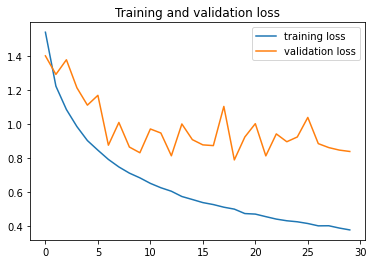

In [227]:
#Plotting training and validation loss
plot_history(history, yrange=(0.9,1))

In [229]:
#Data augmentation by rotatingm shifting (width and height), zooming, flipping, brightening, and filling pixels
#Creaing new validation and traning data with this to train the model on
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, 
                         zoom_range=0.15,
                         width_shift_range=0.2, 
                         height_shift_range=0.2, 
                         shear_range=0.15,
                         horizontal_flip=True, 
                         fill_mode="nearest")
# train the network
history = lecun_model.fit_generator(aug.flow(X_test, y_test, batch_size=15),
	validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
	epochs=15)

In [230]:
#Fitting the model on the augmented data
history = lecun_model.fit_generator(training_generator,    
                    validation_data=val_generator,
                    validation_steps=len(X_train[28000:]) / 32,
                    steps_per_epoch=len(X_train[:28000]) / 32,
                    epochs=15,
                    verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
875/875 - 19s - loss: 1.4930 - accuracy: 0.4730 - val_loss: 1.0585 - val_accuracy: 0.6460 - 19s/epoch - 22ms/step
Epoch 2/15
875/875 - 18s - loss: 1.3540 - accuracy: 0.5173 - val_loss: 0.9600 - val_accuracy: 0.6714 - 18s/epoch - 21ms/step
Epoch 3/15
875/875 - 21s - loss: 1.3081 - accuracy: 0.5339 - val_loss: 1.0337 - val_accuracy: 0.6439 - 21s/epoch - 24ms/step
Epoch 4/15
875/875 - 18s - loss: 1.2770 - accuracy: 0.5490 - val_loss: 1.0879 - val_accuracy: 0.6237 - 18s/epoch - 21ms/step
Epoch 5/15
875/875 - 18s - loss: 1.2447 - accuracy: 0.5592 - val_loss: 0.9813 - val_accuracy: 0.6563 - 18s/epoch - 21ms/step
Epoch 6/15
875/875 - 18s - loss: 1.2273 - accuracy: 0.5644 - val_loss: 1.1765 - val_accuracy: 0.5941 - 18s/epoch - 21ms/step
Epoch 7/15
875/875 - 19s - loss: 1.2155 - accuracy: 0.5707 - val_loss: 0.9433 - val_accuracy: 0.6796 - 19s/epoch - 21ms/step
Epoch 8/15
875/875 - 18s - loss: 1.1847 - accuracy: 0.5823 - val_loss: 0.9955 - val_accuracy: 0.6567 - 18s/epoch - 21ms/step


In [231]:
#Getting the accuracy score of the model
score = lecun_model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [232]:
#Printing the accuracy score
print(lecun_model.metrics_names)
print(score)

['loss', 'accuracy']
[1.1240248680114746, 0.6136000156402588]


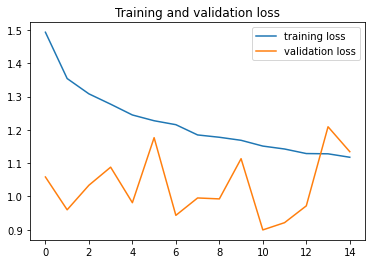

In [233]:
#Plotting training and validation loss
plot_history(history, yrange=(0.9,1))

### **Transfer Learning: Attempting to model using pre-trained weights from ImageNet and Freezing Layers**
In this third attempt, I will be using a ResNet50 architecture, pre-trained with ImageNet (i.e. using pre-trained weights), as suggested by Professor Martell, in order to get better classification results than just those we get from training on this dataset. I will attempt to do this in two different ways (as suggested by [TensorFlow: Transfer Learning and Fine-Tuning](https://www.tensorflow.org/tutorials/images/transfer_learning))

1.   **Feature Extraction:** Adding a new classifier on top of the pretrained ResNet101 model (trained with imagenet) so that we can reuse the already learned feature maps. 
2.   **Fine Tuning:** Freeze the pretrained ResNet101 model (trained with imagenet), then unfreeze a few of the last layers of this model. Then, add classifier layers specific to the CIFAR-10 dataset, which will essentially "fine tune" features specific to our original dataset (CIFAR-10).



In [235]:
pip install keras_applications

In [349]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = cifar10.load_data()

In [350]:
#Prep-processing to change the shape of input

#Tranforming categorical data to encoded (numerical) values
y_train_full = to_categorical(y_train_full, num_classes=10)
y_test_full = to_categorical(y_test_full, num_classes=10)

#Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)
X_train_full = X_train_full.astype('float32')
X_test_full = X_test_full.astype('float32')

In [351]:
#Now we have to split the train data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

In [352]:
#Using the built in keras resnet50 preprocessing function
input = keras.Input(shape=(32, 32, 3))
preprocess_input = keras.applications.resnet50.preprocess_input

In [353]:
#Data augmentation by transforming images
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip('horizontal'),
  layers.RandomFlip('vertical'),
  layers.RandomRotation(0.2)
])

In [354]:
#Creating the base model of this CNN; this is the ResNet101 model wiith pretrained weights from the imagenet dataset
base_model = keras.applications.ResNet50(include_top=False, weights="imagenet", input_shape=(32, 32, 3))

**Freezing the convolutional base**: Below, we are freezing the convolutional base of our model.


In [355]:
#Freezing all layers for feature extraction
for layer in base_model.layers:
  layer.trainable = False

From the above, we can see that the ResNet101 architecture converts a `32, 32, 3` image into a `1, 1, 2048` block of features. At this point, we will add a few dense layers.

In [356]:
#Augmenting the data
#data_augmentation(input)
#Preprocessing
x = keras.applications.resnet50.preprocess_input(input)
#Applying the base model
x = base_model(x)
#Pooling layer
x = layers.GlobalAveragePooling2D()(x)
#Flattening layer
x = layers.Flatten()(x)
#Batch normalization
x = BatchNormalization()(x)
#Fully connected layers with dropout and batch normalization
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.25)(x)
x = BatchNormalization()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = BatchNormalization()(x)
#Classification layer
predictions = layers.Dense(10, activation = 'softmax')(x)
full_model = keras.Model(inputs=input, outputs=predictions)

In [357]:
adam = Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)
sgd = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
full_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [358]:
#Training the CNN
history = full_model.fit(X_train, y_train, batch_size=64, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
438/438 - 22s - loss: 1.6066 - accuracy: 0.4533 - val_loss: 1.1018 - val_accuracy: 0.6209 - 22s/epoch - 49ms/step
Epoch 2/15
438/438 - 9s - loss: 1.2253 - accuracy: 0.5864 - val_loss: 1.0390 - val_accuracy: 0.6440 - 9s/epoch - 22ms/step
Epoch 3/15
438/438 - 9s - loss: 1.1223 - accuracy: 0.6226 - val_loss: 1.0149 - val_accuracy: 0.6477 - 9s/epoch - 21ms/step
Epoch 4/15
438/438 - 10s - loss: 1.0499 - accuracy: 0.6528 - val_loss: 1.0143 - val_accuracy: 0.6491 - 10s/epoch - 22ms/step
Epoch 5/15
438/438 - 10s - loss: 0.9844 - accuracy: 0.6724 - val_loss: 1.0013 - val_accuracy: 0.6540 - 10s/epoch - 23ms/step
Epoch 6/15
438/438 - 9s - loss: 0.9368 - accuracy: 0.6902 - val_loss: 1.0150 - val_accuracy: 0.6504 - 9s/epoch - 21ms/step
Epoch 7/15
438/438 - 10s - loss: 0.8803 - accuracy: 0.7060 - val_loss: 1.0203 - val_accuracy: 0.6550 - 10s/epoch - 23ms/step
Epoch 8/15
438/438 - 9s - loss: 0.8318 - accuracy: 0.7259 - val_loss: 1.0494 - val_accuracy: 0.6489 - 9s/epoch - 21ms/step
Epoch 9/

In [359]:
score = full_model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [360]:
print(full_model.metrics_names)
print(score)

['loss', 'accuracy']
[1.1494468450546265, 0.6593999862670898]


In [361]:
#Now we will begin fine tuning, by unfreezing the layers and re-training 
for layer in base_model.layers:
  layer.trainable = True

In [362]:
adam = Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)
sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.01)
full_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

Based on testing these models, I have decided to use this transfer learning ResNet50 model for my final evaluation. Because of this, I will fit it with 100 epochs and then evaluate with the test sets we set aside in the beginning.

In [363]:
#Training the CNN
resnet_history = full_model.fit(X_train, y_train, batch_size=64, epochs=150, verbose=2, validation_split=0.2)

Epoch 1/150
438/438 - 32s - loss: 1.5122 - accuracy: 0.5309 - val_loss: 1.1292 - val_accuracy: 0.6219 - 32s/epoch - 73ms/step
Epoch 2/150
438/438 - 21s - loss: 0.9722 - accuracy: 0.6924 - val_loss: 0.9601 - val_accuracy: 0.6786 - 21s/epoch - 48ms/step
Epoch 3/150
438/438 - 21s - loss: 0.8282 - accuracy: 0.7458 - val_loss: 1.0311 - val_accuracy: 0.6764 - 21s/epoch - 48ms/step
Epoch 4/150
438/438 - 21s - loss: 0.7386 - accuracy: 0.7715 - val_loss: 1.0385 - val_accuracy: 0.6821 - 21s/epoch - 48ms/step
Epoch 5/150
438/438 - 21s - loss: 0.6741 - accuracy: 0.7914 - val_loss: 0.9525 - val_accuracy: 0.7027 - 21s/epoch - 48ms/step
Epoch 6/150
438/438 - 21s - loss: 0.6428 - accuracy: 0.8061 - val_loss: 1.1254 - val_accuracy: 0.6660 - 21s/epoch - 48ms/step
Epoch 7/150
438/438 - 21s - loss: 0.5727 - accuracy: 0.8282 - val_loss: 1.0124 - val_accuracy: 0.7016 - 21s/epoch - 48ms/step
Epoch 8/150
438/438 - 22s - loss: 0.5399 - accuracy: 0.8383 - val_loss: 0.8395 - val_accuracy: 0.7380 - 22s/epoch - 50

In [364]:
#Score on the test set
score = full_model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [365]:
final_score = full_model.evaluate(X_test_full, y_test_full, batch_size=128, verbose=0)

In [366]:
print(full_model.metrics_names)
print(score)

['loss', 'accuracy']
[1.539452075958252, 0.7815333604812622]


In [367]:
print(full_model.metrics_names)
print(final_score)

['loss', 'accuracy']
[1.5704460144042969, 0.7785999774932861]


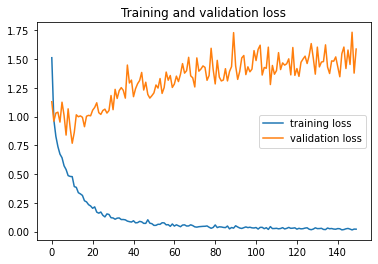

In [368]:
#Plotting training and validation loss
plot_history(resnet_history, yrange=(0.9,1))